<a href="https://colab.research.google.com/github/azizy-123/AI_Projects/blob/main/Week_1_Day_5_NTI_python_with_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression deal with the classifications**
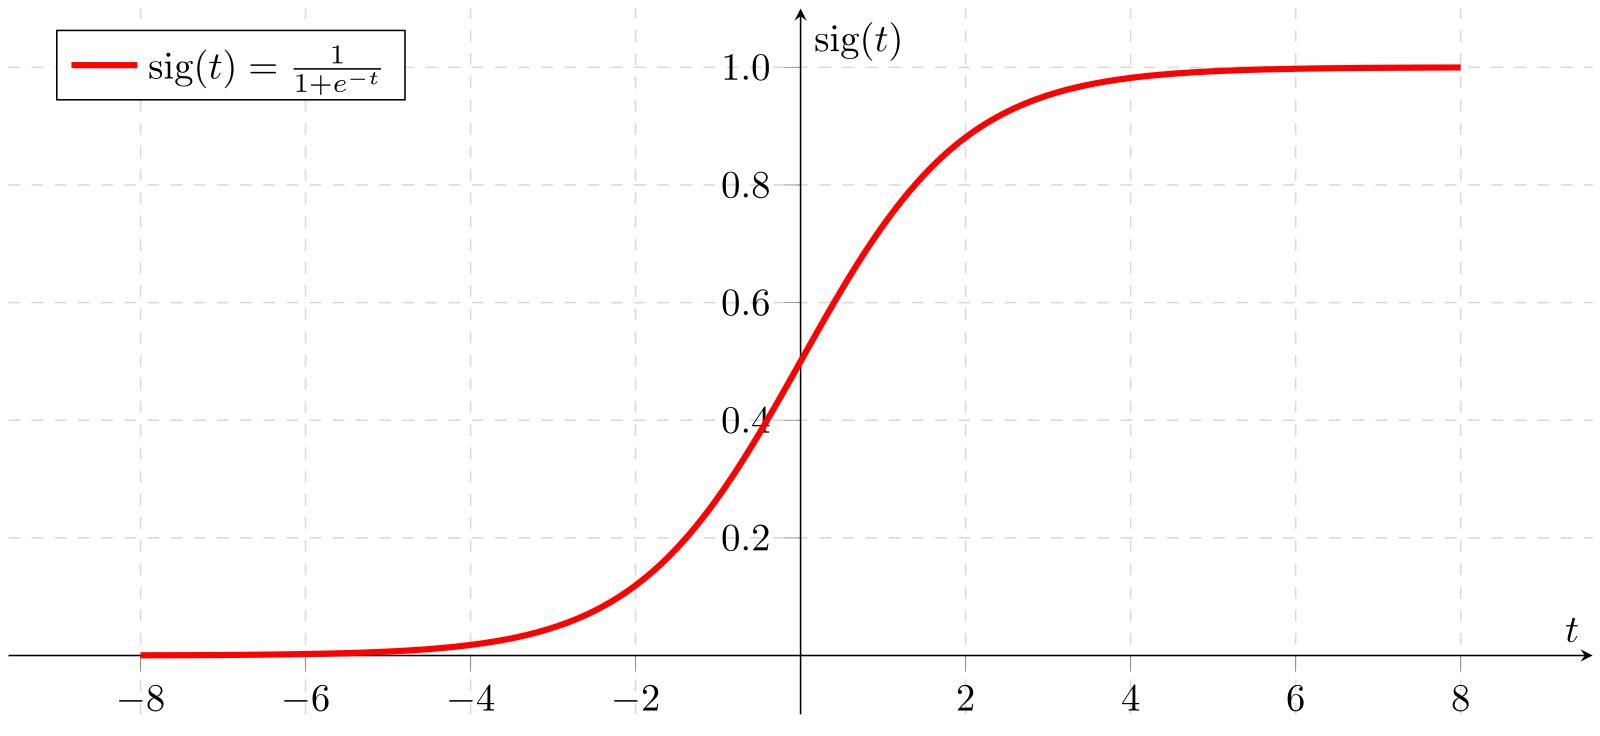

***The sigmoid function, also known as the logistic function, is a mathematical function that produces an S-shaped curve, transforming any input value to a range between 0 and 1***

**Diabetes Predection With Logistic Regression**

# Tasks Required:

EDA: Include pre-processing and Visulizations

-> Note1: Insulin, Skin Thickness Columns will be updated AND You may find Noise

-> Note2: Visulizations required are between ('Pregnancies", "Insulin") and ("Skin Thickness", "Insulin") and ("Blood Pressure", "Insulin") and ("Glucose", "BMI"), Scatter Plots is mandatory while Histogram is optional

Splitting the data (20% Test data)

Modeling: Use Logistic Regression

Visualize confusion matrix and print classification report




In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

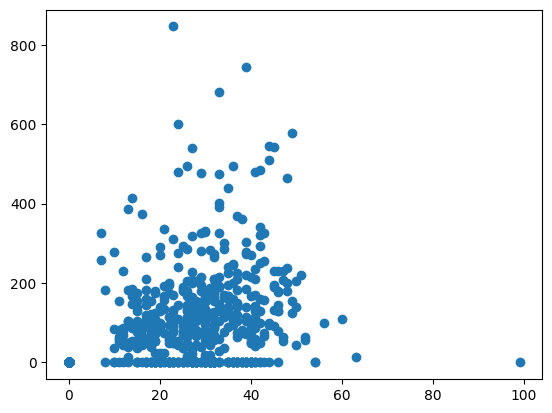

In [423]:
 classDataset = pd.read_csv('classification diabetes.csv')
classDataset
plt.scatter(classDataset["SkinThickness"] , classDataset["Insulin"])
plt.show()

In [424]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [425]:
# Pre-processing and Visualizing
classDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [426]:
classDataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [427]:
classDataset.isnull()
classDataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


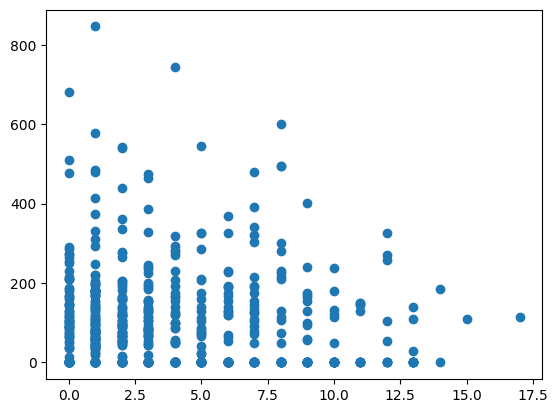

In [428]:
plt.scatter(classDataset["Pregnancies"] , classDataset["Insulin"])

plt.show()

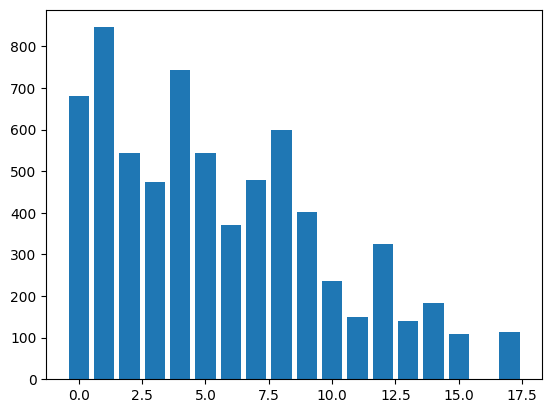

In [429]:
plt.bar(classDataset["Pregnancies"] , classDataset["Insulin"])

plt.show()

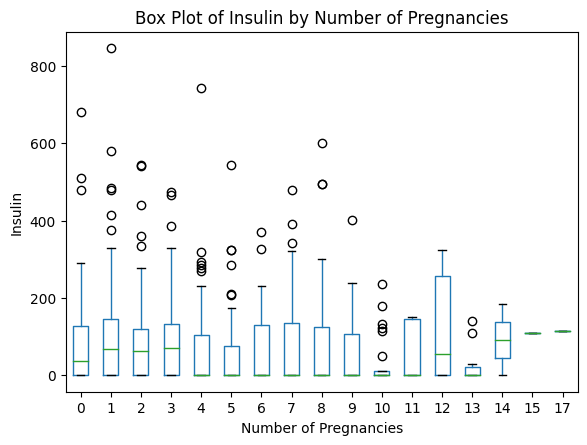

In [430]:
import matplotlib.pyplot as plt

# Create a box plot for Insulin values grouped by Pregnancies
classDataset.boxplot(column="Insulin", by="Pregnancies", grid=False)

plt.title('Box Plot of Insulin by Number of Pregnancies')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Number of Pregnancies')
plt.ylabel('Insulin')
plt.show()


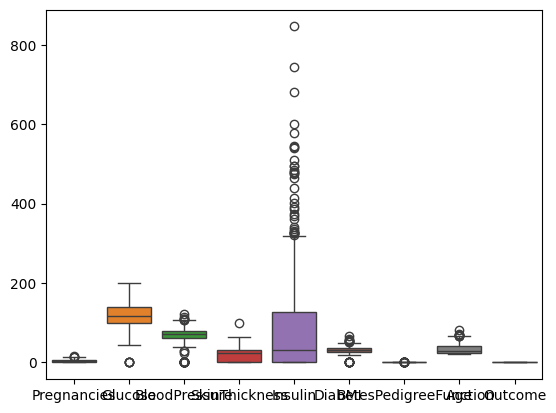

In [431]:
# This code generates a box plot for each numerical column in the DataFrame `df` using Seaborn.
# The `sns.boxplot` function automatically creates box plots for each feature, displaying the distribution,
# potential outliers, and the interquartile range (IQR) of the data.
# Finally, `plt.show()` displays the resulting box plots.


sns.boxplot(data=df)
plt.show()

In [432]:
# Applying the IQR to set the threshold
def handle_outlier(x):
  Q1 = classDataset[x].quantile(0.25)
  Q3 = classDataset[x].quantile(0.75)
  IQR = Q3 - Q1
  minn = Q1 - 1.5 * IQR
  maxx = Q3 + 1.5 * IQR
   # Create a boolean mask to identify outliers
  outliers_mask = (classDataset[x] < minn) | (classDataset[x] > maxx)
  # Remove outliers and reset index
  classDataset_cleaned = classDataset[~outliers_mask]
  classDataset_cleaned.reset_index(drop=True, inplace=True)
  return classDataset_cleaned
  #median_insulin = classDataset[x].median()
  # for i in range(len(classDataset[x])):
  #   #print(classDataset[i])
  #   if classDataset[x][i] > minn and classDataset[x][i] < maxx :
  #     continue
  #   else:

  #     classDataset[:, :].drop(axis = 0, inplace = True)
  #     classDataset.reset_index(drop = True, inplace = True)
  # return classDataset
for col in classDataset.columns:
  classDataset = handle_outlier(col)



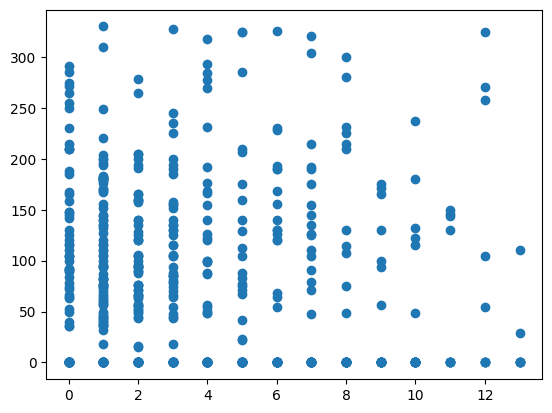

In [433]:
# Create visualizations
plt.scatter(classDataset["Pregnancies"] , classDataset["Insulin"])

plt.show()

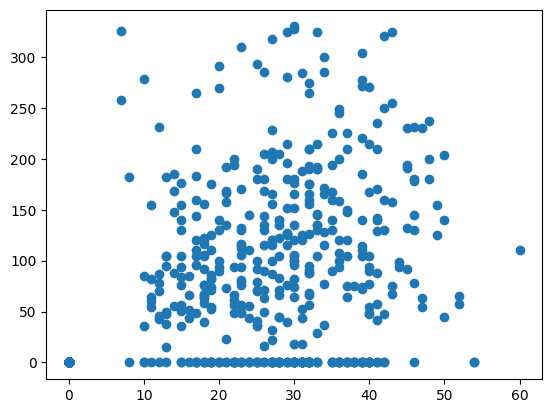

In [434]:
plt.scatter(classDataset["SkinThickness"] , classDataset["Insulin"])
plt.show()

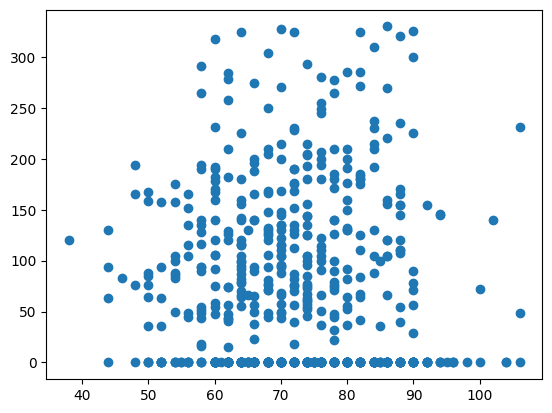

In [435]:
plt.scatter(classDataset["BloodPressure"] , classDataset["Insulin"])
plt.show()

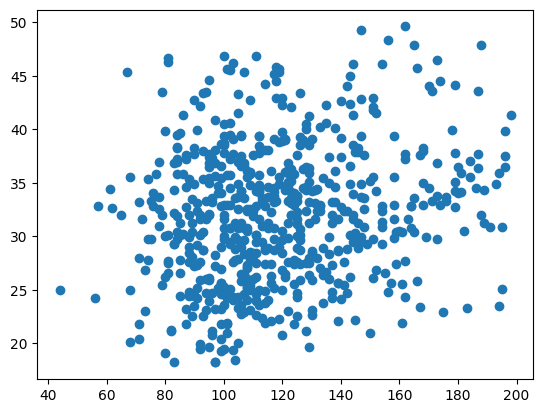

In [436]:
plt.scatter(classDataset["Glucose"] , classDataset["BMI"])
plt.show()

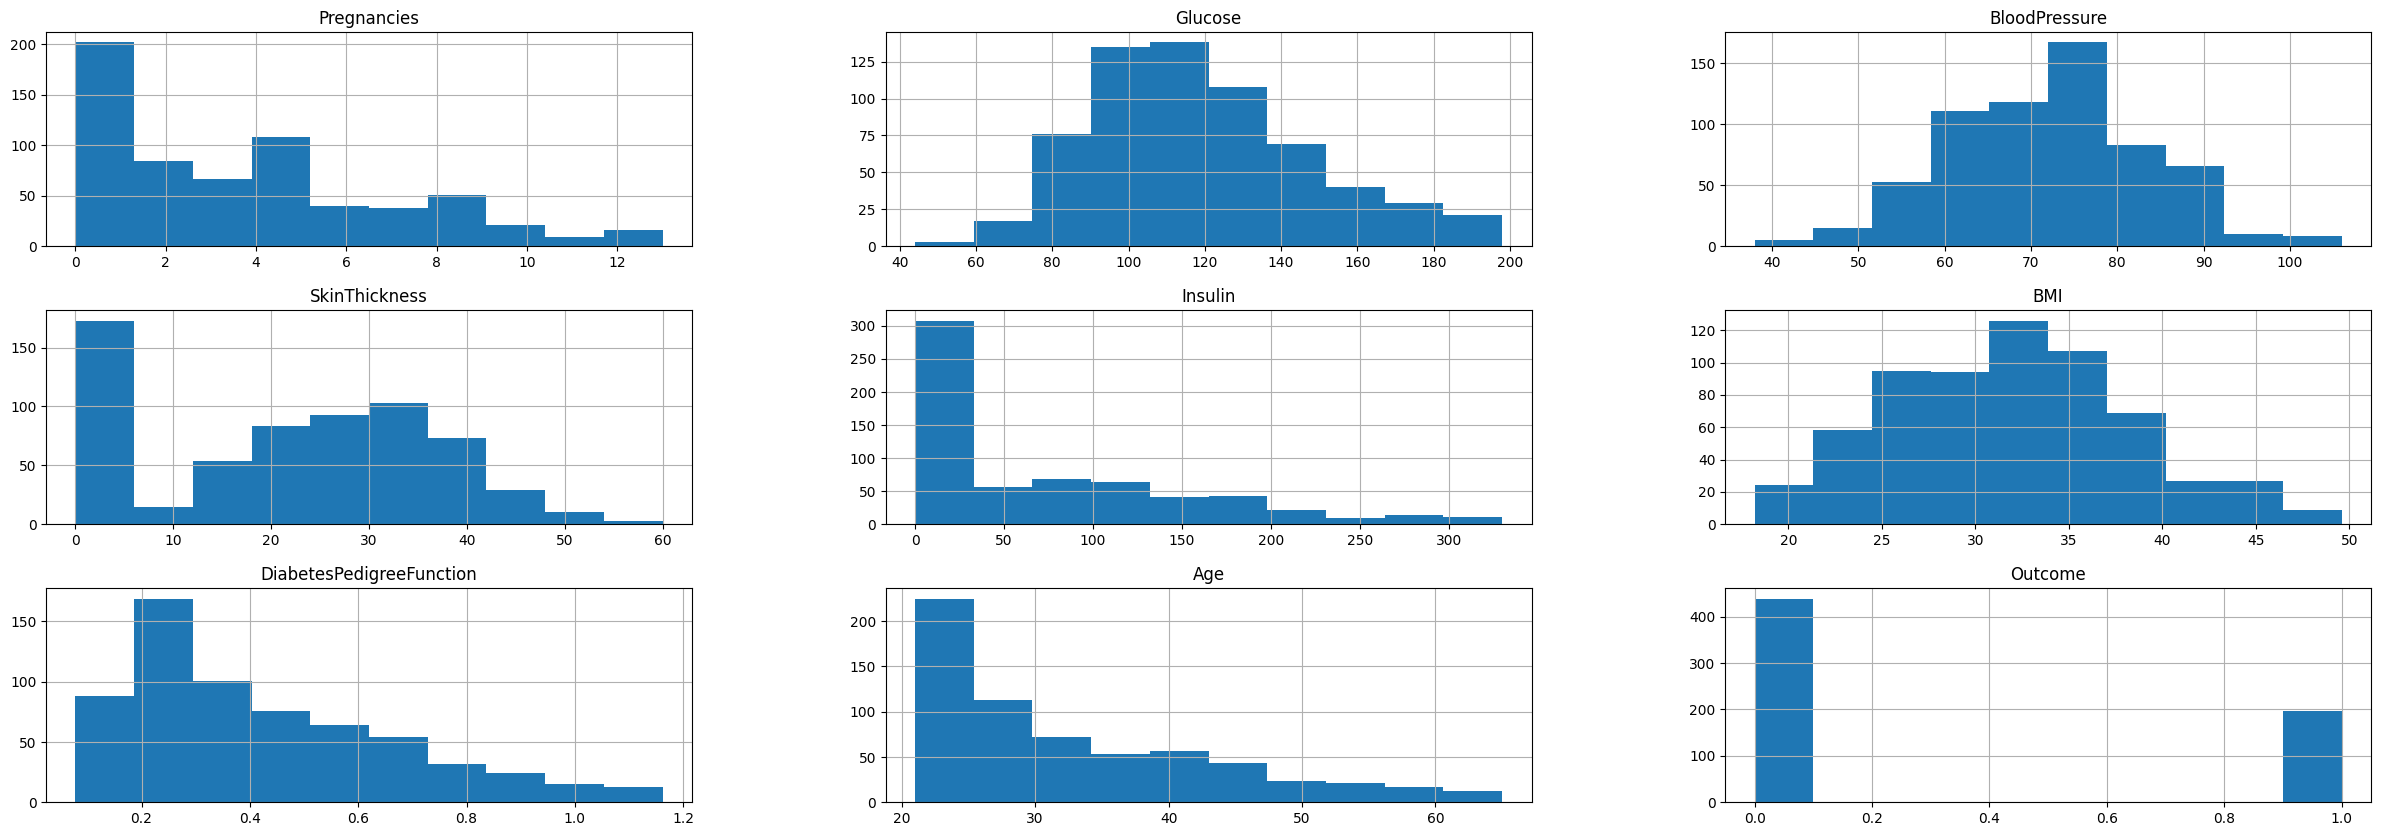

In [437]:
# Histogram for the whole data
classDataset.hist(figsize = (30,10))
plt.show()

In [438]:
classDataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [439]:
classDataset['Insulin'] = classDataset['Insulin'].replace(np.nan,classDataset['Insulin'].mean())

In [440]:
classDataset['SkinThickness'] = classDataset['SkinThickness'].replace(np.nan, classDataset['SkinThickness'].mean())

In [441]:
classDataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [442]:

x = classDataset.drop('Outcome', axis=1)
y = classDataset['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [443]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [444]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [445]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[81,  8],
       [19, 20]])

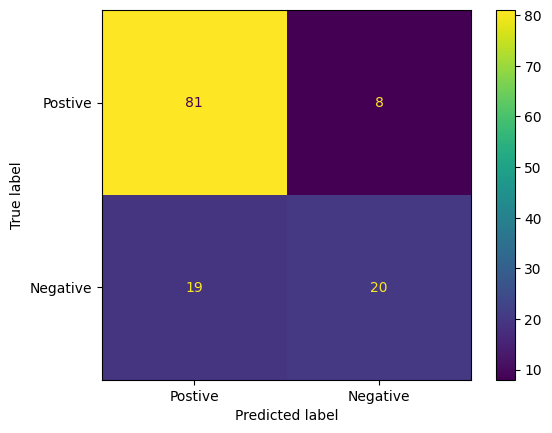

In [446]:
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Postive','Negative'])
dis.plot()
plt.show()

In [447]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        89
           1       0.71      0.51      0.60        39

    accuracy                           0.79       128
   macro avg       0.76      0.71      0.73       128
weighted avg       0.78      0.79      0.78       128



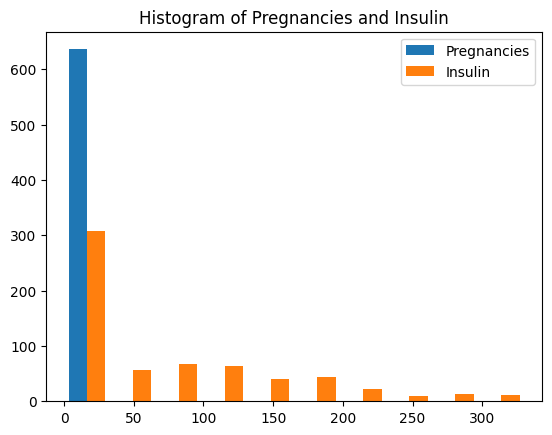

In [448]:
plt.hist([classDataset['Pregnancies'], classDataset['Insulin']])
plt.title('Histogram of Pregnancies and Insulin')
plt.legend(['Pregnancies', 'Insulin'])
plt.show()

In [449]:
classDataset['Pregnancies'].value_counts()

,count
Pregnancies,
1,114
0,88
2,84
3,67
4,59
5,49
6,40
7,38
8,29


In [450]:
# Min Max
# Used to make a normalization for the data to find the true curve between 0 -> 1

def minMax (myList):
  x_norm = (myList - myList.min()) / (myList.max() - myList.min())
  return x_norm
import pandas as pd

# Example dataset

df = pd.read_csv('classification diabetes.csv')
print(df)
minMax(df)



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [451]:
# Calculate the Accuracy before minMax was 0.726568
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7890625

In [452]:
# z-score normalization
def Zscore_norm(myList):
  Z_score_of_x = (myList - myList.mean()) / myList.std()
  return Z_score_of_x


df = pd.read_csv('classification diabetes.csv')
print("Original DataFrame:")
print(df)
print("\nZ-score Normalized DataFrame:")
Zscore_norm(df)

Original DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1.365006
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,-0.731643
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1.365006
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,-0.731643
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1.365006
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487,-0.731643
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677,-0.731643
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580,-0.731643
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1.365006


In [453]:
# Calculate the Accuracy after z-score normalization
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7890625